# **Mini Projeto - Walmart**



## **Introdução**
A rede de varejo Walmart tem como objetivo identificar a loja com maior potencial de crescimento para sua expansão, por meio da análise de dados de vendas semanais de 45 lojas varejistas da rede, além de informações sobre métricas econômicas e meteorológicas por semana. Com o intuito de atingir esse objetivo, será utilizada a metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining), que é amplamente utilizada em projetos de análise de dados. 

Este relatório detalha o processo de análise de dados, seguindo a metodologia CRISP-DM, e apresenta os resultados obtidos, a fim de fornecer subsídios para a tomada de decisão da rede Walmart.

## **Estratégia de escolha**
O Walmart pretende aumentar em 30% o volume semanal de vendas de uma de suas lojas e para isso será adotada uma estratégia que considera três aspectos principais:

1. Análise das vendas totais: será realizada uma análise das vendas totais de cada loja durante todo o período do dataset. As lojas com as maiores vendas totais serão identificadas como boas candidatas para a expansão, pois já demonstraram um bom desempenho em vendas.

2. Análise das vendas médias: será analisada a média das vendas semanais de cada loja. As lojas com as maiores vendas médias serão consideradas opções mais consistentes em suas vendas ao longo do tempo e, portanto, podem ser boas opções para a expansão.

3. Análise da variação percentual nas vendas: será avaliada a variação percentual nas vendas de cada loja ao longo do tempo. As lojas com a menor variação percentual podem ter vendas mais estáveis e previsíveis, o que pode ser uma vantagem para a expansão.

Dessa forma, a estratégia será focada em selecionar uma loja que tenha um histórico consistente de vendas, com vendas totais elevadas, médias semanais estáveis e variação percentual baixa. Com base nessas análises, a loja escolhida terá mais chances de apresentar um desempenho positivo e consistente no futuro, o que será crucial para a expansão da rede Walmart.



## **Instalação e importação das bibliotecas necessárias**

Para a importação, manipulação e análise preliminar dos dados será usada a biblioteca [**Pandas**](https://pandas.pydata.org/). A visualização de gráficos estáticos e estatísticos será através do [**Matplotlib**](https://matplotlib.org/) e [**Seaborn**](https://seaborn.pydata.org/).

<img alt="Pandas" width="30%" src="https://pandas.pydata.org/static/img/pandas.svg"><img alt="Matplotlib" width="30%" src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png"><img alt="Seaborn" width="30%" src="https://seaborn.pydata.org/_images/logo-wide-lightbg.svg">

In [423]:
!pip install -q mplcyberpunk

In [424]:
# importação de pacotes necessários
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns
import mplcyberpunk
plt.style.use("cyberpunk")

## **Coleta e Entendimento dos dados**

O dataset Walmart disponível no [Kaggle](https://www.kaggle.com/yasserh/walmart-dataset) contém informações sobre as vendas semanais de 45 lojas varejistas da rede Walmart entre 05/02/2010 e 01/11/2012, bem como algumas métricas econômicas e meteorológicas por semana. Com um total de oito variáveis, incluindo o número da loja, semana de venda, venda naquela semana, flag de semana com feriado, temperatura do dia em °F, preço do combustível na região da loja, índice de preços ao consumidor e taxa de desemprego, este conjunto de dados oferece informações valiosas para a análise do desempenho de vendas de cada loja e para a seleção da loja com o melhor potencial de expansão. 

Através da compreensão desses dados, é possível identificar padrões e tendências que podem ser utilizados para orientar a tomada de decisão da rede Walmart na seleção da loja para a expansão.

In [425]:
df_wm=pd.read_csv("https://raw.githubusercontent.com/travensolli/formacao_dados_DNC/main/Mini%20Projeto%202%20-%20Walmart/Walmart.csv")
df_wm['Date'] = pd.to_datetime(df_wm['Date'], format = '%d-%m-%Y')
df_wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [426]:
# identificar o volume de dados do DataFrame
print("Quantidade de variáveis: {}".format(df_wm.shape[1]))
print("Quantidade de registros de vendas semanais para todas as lojas: {}".format(df_wm.shape[0]))
#numero de lojas unicos
print('Quantidade de lojas: {}'.format(len(df_wm['Store'].unique())))

#numero de semanas unicas
print('Quantidade de semanas: {}'.format(len(df_wm['Date'].unique())))

Quantidade de variáveis: 8
Quantidade de registros de vendas semanais para todas as lojas: 6435
Quantidade de lojas: 45
Quantidade de semanas: 143


Verifica-se no dataset original que há 8 atributos e 6.435 registros de vendas semanais ao longo de 143 semanas, sendo 45 lojas únicas.

In [427]:
# verificar os tipos de variáveis do dataset
display(df_wm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


None

Verifica-se que o dataset apresentado possui 6435 observações sem valores nulos e que todas as variáveis são numéricas, incluindo a data e valor das vendas, bem como informações sobre as condições de temperatura, preços de combustível, índice de preços ao consumidor e taxa de desemprego.

### **Dicionário de variáveis**

O *dataset* possui colunas nomeadas que facilitam a identificação das informações que ele nos traz, podendo ser estruturado o **dicionário de variáveis** a seguir:

* **Store**: identificador único da loja
* **Date**: data da venda
* **Weekly_Sales**: valor das vendas semanais em dólares americanos
* **Holiday_Flag**: variável binária indicando se a semana da venda incluiu um feriado (1) ou não (0)
* **Temperature**: temperatura média da região da loja na semana da venda em graus Fahrenheit
* **Fuel_Price**: preço médio do combustível na região da loja na semana da venda em dólares americanos por galão
* **CPI**: índice de preços ao consumidor (Consumer Price Index) que mede as mudanças nos preços de bens e serviços ao longo do tempo na região da loja
* **Unemployment**: taxa de desemprego na região da loja durante a semana da venda.


As variáveis deste dataset podem ser classificadas em diferentes tipos, incluindo:

- **Variáveis numéricas contínuas**: são variáveis numéricas que podem assumir qualquer valor em um intervalo contínuo. Neste dataset, as variáveis numéricas contínuas são: Weekly_Sales, Temperature, Fuel_Price, CPI e Unemployment. Essas variáveis podem ser importantes para entender como fatores como clima, economia e preços afetam as vendas semanais das lojas.

- **Variáveis binárias**: são variáveis que assumem apenas dois valores possíveis. Neste dataset, a variável Holiday_Flag é binária e indica se a semana da venda incluiu um feriado ou não. Essa variável pode ser importante para analisar como os feriados afetam as vendas semanais.

- **Variáveis categóricas**: são variáveis que não são numéricas e não possuem uma ordem ou escala. Neste dataset, a única variável categórica é Store, que é um identificador único para cada loja. Essa variável pode ser importante para analisar como as vendas semanais variam entre diferentes lojas.

Essas classificações podem ser importantes para entender como as variáveis podem ser relacionadas entre si e para a escolha de modelos de análise adequados. Por exemplo, pode ser interessante aplicar análises de regressão linear para variáveis contínuas e modelos de classificação para variáveis binárias e categóricas.

## **Critérios avaliados pelo Walmart**
Após a apresentação das variáveis presentes no dataset, o Walmart decidiu que também vai considerar outros critérios para a expansão, como a taxa de desemprego e o índice de preços ao consumidor (CPI) nas regiões onde as lojas estão localizadas. 

O objetivo é investir em lojas localizadas em regiões onde a taxa de desemprego e o CPI estejam em queda, garantindo assim a rentabilidade do investimento e a qualidade das vendas. Por outro lado, lojas em regiões onde a taxa de desemprego e o CPI estão aumentando não são interessantes para expandir no momento. 

Com esses critérios, o Walmart espera selecionar a melhor loja para expandir seu negócio e maximizar o retorno sobre o investimento.

## **Tratamento dos dados**

Durante a fase de limpeza de dados do processo CRISP-DM, é essencial selecionar apenas os dados que são relevantes para a análise dos critérios estabelecidos. Nesse sentido, as colunas **Temperature** e **Fuel_Price** serão removidas, já que não contribuem diretamente para o objetivo da análise. 

Por outro lado, serão adicionadas colunas que fornecem informações importantes, como vendas totais acumuladas, vendas médias semanais e variação de vendas semanal. Essas colunas adicionais permitirão uma análise mais detalhada e precisa, ajudando a identificar a loja com o maior potencial de expansão para a rede Walmart.

In [428]:
# Criação de um novo Dataframe somente com as varáveis relevantes para análise
df=df_wm[['Store','Date','Holiday_Flag','Weekly_Sales','CPI','Unemployment']]

In [429]:
# ordena o DataFrame pela coluna 'Store' e 'Date'
df = df.sort_values(['Store', 'Date'])

# cria uma nova coluna com as vendas semanais da semana anterior
df['Last_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift()
# calcula a diferença entre as vendas semanais atuais e as vendas semanais da semana anterior
df['Weekly_Sales_Change'] = df['Weekly_Sales'] - df['Last_Week_Sales']
# calcula a variação percentual das vendas semanais ao longo do tempo
df['Weekly_Sales_Pct_Change'] = (df['Weekly_Sales_Change'] / df['Last_Week_Sales']) * 100
#remove as colunas auxiliares da variação percentual
df = df.drop(['Last_Week_Sales', 'Weekly_Sales_Change'], axis=1)

# criando a coluna de venda semanal média por loja
weekly_sales_mean = df.groupby(['Store'])['Weekly_Sales'].mean()
df['Mean_Weekly_Sales'] = df['Store'].map(weekly_sales_mean)

# criando a coluna de vendas acumuladas totais
df['Cumulative_Sales'] = df.groupby('Store')['Weekly_Sales'].cumsum()
df.head(5)

,Store,Date,Holiday_Flag,Weekly_Sales,CPI,Unemployment,Weekly_Sales_Pct_Change,Mean_Weekly_Sales,Cumulative_Sales
0,1,2010-02-05,0,1643690.90,211.096358,8.106,NaN,1.555264e+06,1643690.90
1,1,2010-02-12,1,1641957.44,211.242170,8.106,-0.105461,1.555264e+06,3285648.34
2,1,2010-02-19,0,1611968.17,211.289143,8.106,-1.826434,1.555264e+06,4897616.51
3,1,2010-02-26,0,1409727.59,211.319643,8.106,-12.546189,1.555264e+06,6307344.10
4,1,2010-03-05,0,1554806.68,211.350143,8.106,10.291285,1.555264e+06,7862150.78


### **Método describe()**

O método describe nos apresenta informações estatísticas sobre cada coluna. O número de registros é 6.435. A coluna **Weekly_Sales** apresenta um valor médio de vendas semanais de 1.046.965 dólares, com um desvio padrão de 564.366 dólares e um valor mínimo de 209.986 dólares e um valor máximo de 3.818.686 dólares. A maioria das semanas não foi considerada feriado (**Holiday_Flag**=0), e a coluna **CPI** apresenta uma média de 171,58 de Índice de Preços ao Consumidor. Em geral, a taxa de desemprego média (**Unemployment**) foi de 7,99%, e a média de variação nas vendas semanais em relação à semana anterior foi de 0,67%. Este tipo de informação é útil para compreender o desempenho de vendas na rede de supermercados e, possivelmente, pode ajudar na identificação de fatores que influenciam as vendas.

In [430]:
df.describe()

,Store,Holiday_Flag,Weekly_Sales,CPI,Unemployment,Weekly_Sales_Pct_Change,Mean_Weekly_Sales,Cumulative_Sales
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6390.000000,6.435000e+03,6.435000e+03
mean,23.000000,0.069930,1.046965e+06,171.578394,7.999151,0.666219,1.046965e+06,7.521959e+07
std,12.988182,0.255049,5.643666e+05,39.356712,1.875885,11.896114,5.405605e+05,6.245455e+07
min,1.000000,0.000000,2.099862e+05,126.064000,3.879000,-67.607902,2.598617e+05,2.745934e+05
25%,12.000000,0.000000,5.533501e+05,131.735000,6.891000,-4.391317,5.564039e+05,2.722186e+07
50%,23.000000,0.000000,9.607460e+05,182.616521,7.874000,-0.177811,9.667816e+05,5.736365e+07
75%,34.000000,0.000000,1.420159e+06,212.743293,8.622000,4.836088,1.395901e+06,1.089917e+08
max,45.000000,1.000000,3.818686e+06,227.232807,14.313000,111.193449,2.107677e+06,3.013978e+08


### **Visualização das vendas semanais para identificação de outliers**

O conjunto de dados apresenta um alto desvio padrão para as vendas semanais, o que pode indicar a presença de valores discrepantes ou outliers. Para identificar esses valores, é possível utilizar a visualização do gráfico de linhas de vendas ao longo do tempo. Essa ferramenta permite observar os padrões e tendências das vendas semanais e identificar pontos fora do comum que podem ser indicativos de valores discrepantes. Essa identificação é importante para entender o comportamento das vendas e tomar decisões estratégicas apropriadas, como a remoção dos outliers para uma análise mais precisa e eficaz. Portanto, a análise visual é uma ferramenta poderosa para entender os dados e identificar possíveis problemas, como valores discrepantes nas vendas semanais, que podem afetar as decisões de negócios.

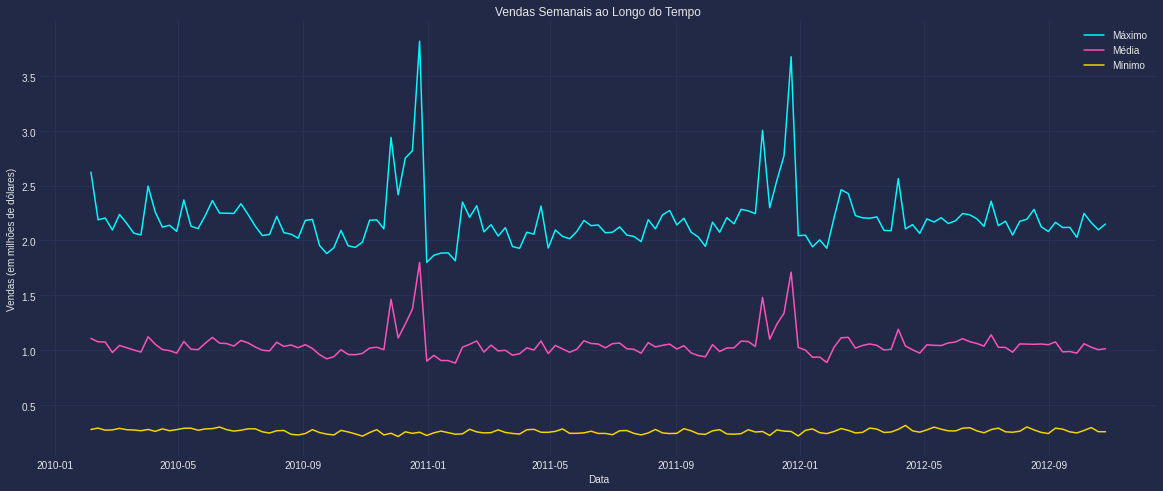

In [431]:
# agrupa os dados pela data e calcula os valores máximo, mínimo e médio de vendas semanais
df_grouped = df.groupby('Date')['Weekly_Sales'].agg(['max', 'min', 'mean'])

# cria o gráfico de linhas
plt.figure(figsize=(20,8))
plt.plot(df_grouped.index, df_grouped['max'], label='Máximo')
plt.plot(df_grouped.index, df_grouped['mean'], label='Média')
plt.plot(df_grouped.index, df_grouped['min'], label='Mínimo')
#plt.fill_between(df_grouped.index, df_grouped['min'], df_grouped['max'], alpha=0.2, label='Intervalo')

# configura o gráfico
plt.title('Vendas Semanais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas (em milhões de dólares)')
plt.legend()
# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente

# exibe o gráfico
plt.show()

Os picos de vendas discrepantes entre os meses de novembro e dezembro, identificados no gráfico de linhas de vendas ao longo do tempo, podem ter influência significativa na análise de escolha de uma loja. Esses valores atípicos podem distorcer a média e o desvio padrão das vendas semanais, o que pode levar a conclusões equivocadas sobre o desempenho geral da loja. Portanto, é importante remover esses outliers antes de realizar análises mais aprofundadas, a fim de garantir uma avaliação mais precisa e confiável do desempenho da loja ao longo do tempo.

### **Influência dos feriados**

Os feriados listados apresentam uma variedade de eventos ao longo do ano, incluindo o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. Esses feriados são conhecidos por influenciar significativamente o comportamento de compra do consumidor e, portanto, podem impactar as vendas de uma empresa. Especificamente, o período entre o Dia de Ação de Graças e o Natal é conhecido por ser um período de alta demanda para o varejo, com muitos consumidores fazendo compras para presentes de Natal. Esse período é caracterizado por um grande aumento nas vendas semanais em comparação com outras semanas do ano.

Portanto, para obter uma análise mais confiável sobre o desempenho da loja, pode ser benéfico remover os registros de vendas semanais nesse período. Isso permitiria que a empresa determinasse a melhor localização para expandir com base no desempenho da loja fora do período de pico de compras de Natal.

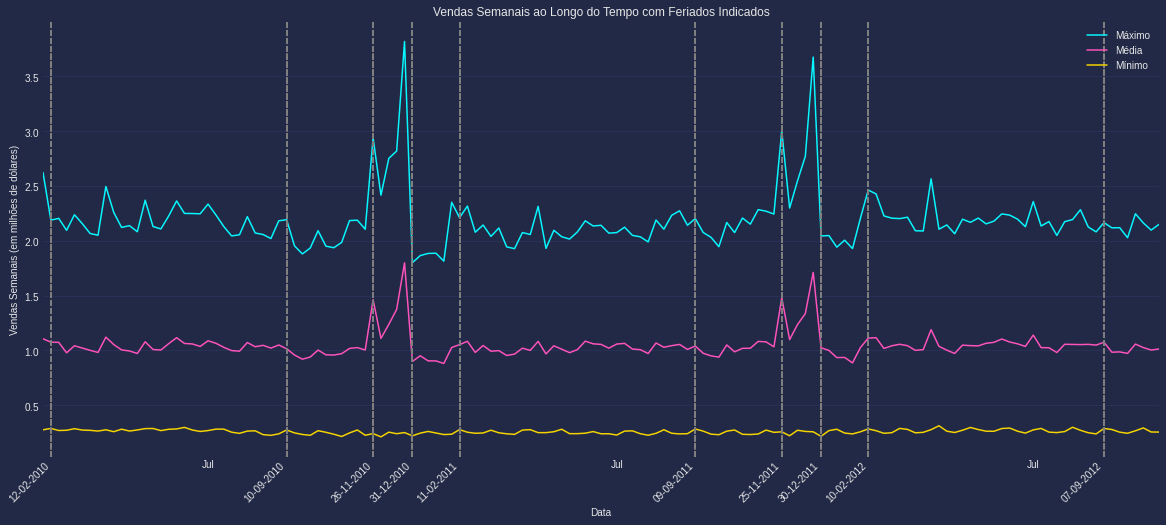

In [432]:
# agrupa os dados pela data e calcula os valores máximo, mínimo e médio de vendas semanais
df_grouped = df.groupby('Date')['Weekly_Sales'].agg(['max', 'min', 'mean'])
# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(20,8))

# Plotar o gráfico de linha das vendas ao longo do tempo
df_grouped['max'].plot(x='Date', y='Weekly_Sales', ax=ax,label='Máximo')
df_grouped['mean'].plot(x='Date', y='Weekly_Sales', ax=ax,label='Média')
df_grouped['min'].plot(x='Date', y='Weekly_Sales', ax=ax,label='Mínimo')
# Adicionar uma linha vertical em cada data de feriado
feriados = df[df['Holiday_Flag'] == 1]['Date']
for feriado in feriados:
    ax.axvline(x=feriado, color='gray', linestyle='--')
    
# Configurar as legendas e os títulos
ax.set_xlabel('Data')
ax.set_ylabel('Vendas Semanais (em milhões de dólares)')
ax.set_title('Vendas Semanais ao Longo do Tempo com Feriados Indicados')

# Definir os ticks e as labels de tick para os feriados
ax.set_xticks(feriados.unique())
ax.set_xticklabels(feriados.dt.strftime('%d-%m-%Y').unique(), rotation=45, ha='right')

# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente
# Mostrar o gráfico
plt.legend(loc='upper right')
plt.show()

### **Remoção de dados dos feriados de fim de ano**
Os dados entre as semanas que vão de 26/11/2010 a 30/12/2010 e de 25/11/2011 a 29/12/2011 serão removidos para uma análise mais confiável. Essas semanas incluem o período entre o Dia de Ação de Graças e o Natal nos Estados Unidos, uma época conhecida por suas vendas expressivas, especialmente a famosa "Black Friday".

A remoção dessas semanas permitirá uma análise mais consistente e precisa do comportamento das vendas semanais ao longo do tempo, sem picos discrepantes que poderiam ser influenciados pelas compras de final de ano. Sem esses picos, será possível identificar tendências mais claras e consistentes nas vendas semanais, o que pode ajudar na tomada de decisões para a expansão de uma loja.


In [433]:
# criando um novo dataframe sem as datas selecionadas
df_clean = df[~df['Date'].between('2010-11-26', '2010-12-30') & ~df['Date'].between('2011-11-25', '2011-12-29')].reset_index()

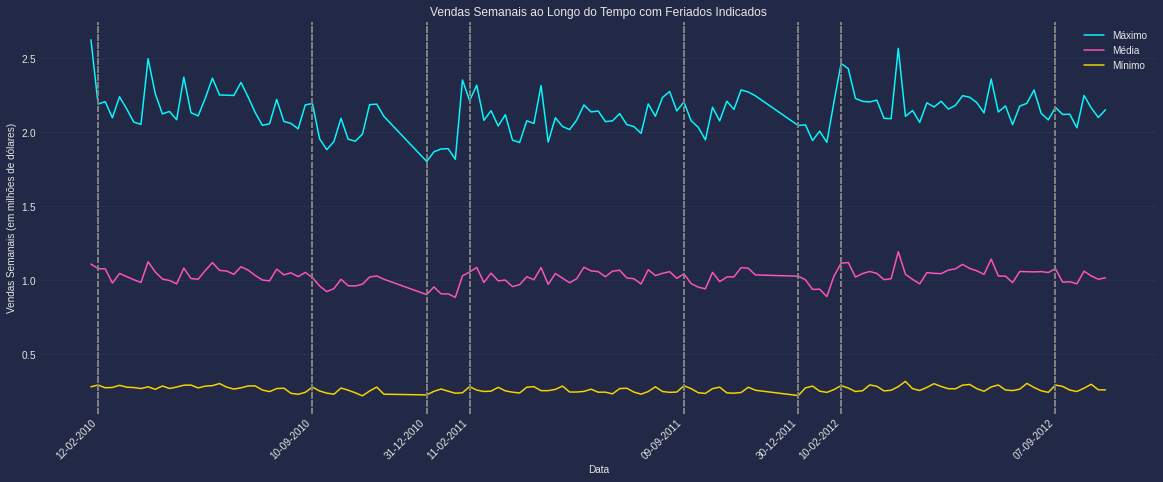

In [434]:
# agrupa os dados pela data e calcula os valores máximo, mínimo e médio de vendas semanais
df_grouped = df_clean.groupby('Date')['Weekly_Sales'].agg(['max', 'min', 'mean'])
# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(20,8))

# Plotar o gráfico de linha das vendas ao longo do tempo
df_grouped['max'].plot(x='Date', y='Weekly_Sales', ax=ax,label='Máximo')
df_grouped['mean'].plot(x='Date', y='Weekly_Sales', ax=ax,label='Média')
df_grouped['min'].plot(x='Date', y='Weekly_Sales', ax=ax,label='Mínimo')
# Adicionar uma linha vertical em cada data de feriado
feriados = df_clean[df_clean['Holiday_Flag'] == 1]['Date']
for feriado in feriados:
    ax.axvline(x=feriado, color='gray', linestyle='--')
    
# Configurar as legendas e os títulos
ax.set_xlabel('Data')
ax.set_ylabel('Vendas Semanais (em milhões de dólares)')
ax.set_title('Vendas Semanais ao Longo do Tempo com Feriados Indicados')

# Definir os ticks e as labels de tick para os feriados
ax.set_xticks(feriados.unique())
ax.set_xticklabels(feriados.dt.strftime('%d-%m-%Y').unique(), rotation=45, ha='right')

# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente
# Mostrar o gráfico
plt.legend(loc='upper right')
plt.show()

### **Recálculo das colunas de métricas auxiliares**

Com a remoção dos dados referentes aos feriados de fim de ano, é necessário realizar uma nova apuração das colunas de métricas adicionais de média de vendas semanal por loja, vendas totais acumuladas por loja e variação de vendas semanal. Isso ocorre porque a remoção desses dados pode ter impactado significativamente nas estatísticas de vendas semanais, afetando a média e a variação de vendas. Além disso, a remoção desses dados pode ter afetado o total de vendas acumuladas por loja. Portanto, é importante realizar essa nova apuração para garantir que as análises e decisões baseadas nas métricas de vendas sejam precisas e confiáveis.

In [435]:
# ordena o DataFrame pela coluna 'Store' e 'Date'
df_clean = df_clean.sort_values(['Store', 'Date'])

# cria uma nova coluna com as vendas semanais da semana anterior
df_clean['Last_Week_Sales'] = df_clean.groupby('Store')['Weekly_Sales'].shift()
# calcula a diferença entre as vendas semanais atuais e as vendas semanais da semana anterior
df_clean['Weekly_Sales_Change'] = df_clean['Weekly_Sales'] - df_clean['Last_Week_Sales']
# calcula a variação percentual das vendas semanais ao longo do tempo
df_clean['Weekly_Sales_Pct_Change'] = (df_clean['Weekly_Sales_Change'] / df_clean['Last_Week_Sales']) * 100
#remove as colunas auxiliares da variação percentual
df_clean = df_clean.drop(['Last_Week_Sales', 'Weekly_Sales_Change'], axis=1)

# criando a coluna de venda semanal média por loja
weekly_sales_mean = df_clean.groupby(['Store'])['Weekly_Sales'].mean()
df_clean['Mean_Weekly_Sales'] = df_clean['Store'].map(weekly_sales_mean)

# criando a coluna de vendas acumuladas totais
df_clean['Cumulative_Sales'] = df_clean.groupby('Store')['Weekly_Sales'].cumsum()

## **O Dataset de vendas semanais pronto para análise**

Após a limpeza e tratamento dos dados de vendas semanais de lojas, o dataset foi reduzido para incluir apenas as colunas mais relevantes para a análise, como a data, o ID da loja e o valor de vendas semanais. Além disso, foram acrescentadas colunas com métricas importantes, como o valor total acumulado de vendas por loja e a variação percentual de vendas em relação à semana anterior. Com essas informações em mãos, podemos realizar diversas análises e tirar insights valiosos para o mercado varejista. A remoção dos registros de vendas entre a ação de graças e natal permitirá uma análise mais confiável do desempenho das lojas, sem a influência dos picos discrepantes de vendas nesses períodos. Com um dataset mais limpo e enriquecido com informações úteis, estamos prontos para começar a explorar os dados e extrair informações relevantes para a tomada de decisão.


### **Análise estatística do Dataset**


Será realizada uma breve análise estatística dos dados utilizando o método describe, que nos fornecerá informações sobre a distribuição dos dados e seus principais parâmetros estatísticos. Com essas análises, será possível ter uma visão mais detalhada sobre o as vendas semanais e auxiliar na tomada de decisões e insights.




In [436]:
df_clean.describe()

,index,Store,Holiday_Flag,Weekly_Sales,CPI,Unemployment,Weekly_Sales_Pct_Change,Mean_Weekly_Sales,Cumulative_Sales
count,5985.000000,5985.000000,5985.000000,5.985000e+03,5985.000000,5985.000000,5940.000000,5.985000e+03,5.985000e+03
mean,3217.075188,23.000000,0.060150,1.021628e+06,171.618254,7.988579,0.259890,1.021628e+06,6.825271e+07
std,1857.800422,12.988258,0.237785,5.333217e+05,39.370906,1.874825,8.055570,5.247574e+05,5.625574e+07
min,0.000000,1.000000,0.000000,2.135383e+05,126.064000,3.879000,-52.877437,2.609527e+05,2.745934e+05
25%,1606.000000,12.000000,0.000000,5.475133e+05,131.735000,6.891000,-4.343464,5.554454e+05,2.514207e+07
50%,3217.000000,23.000000,0.000000,9.475524e+05,182.622509,7.874000,-0.403803,9.461724e+05,5.221399e+07
75%,4828.000000,34.000000,0.000000,1.396927e+06,212.903312,8.622000,4.057200,1.373233e+06,9.825176e+07
max,6434.000000,45.000000,1.000000,2.623470e+06,227.232807,14.313000,75.912231,2.050848e+06,2.727628e+08


Com o dataset de vendas de supermercados já limpo e organizado, é possível observar como a remoção de outliers de datas comemorativas influencia na redução do desvio padrão. Além disso, o resultado do describe apresenta outras métricas interessantes, como a média de vendas semanais, que é de cerca de 1 milhão de dólares, e o desvio padrão, que é de aproximadamente 533 mil dólares. Também é possível observar que a mediana das vendas semanais é de 947 mil dólares, e que o valor máximo de vendas semanais média é de 2.050.848 dólares. Este valor pode ser considerado um teto entre todas as lojas, e para que outra loja tenha um crescimento de 30% e atinja este valor teto, é necessário que ela tenha uma média de vendas semanais anterior de cerca de 1.577.582 dólares.

### **Total de vendas acumuladas**

Através da plotagem do gráfico de vendas acumuladas por loja, podemos visualizar como as vendas das lojas evoluíram ao longo do tempo e qual é a distribuição dessas vendas no conjunto de dados. Observamos que as lojas com as maiores vendas acumuladas estão no patamar de acima de 200 milhões de dólares, enquanto as lojas com menor volume de vendas acumuladas estão abaixo dos 50 milhões de dólares. Essa visualização nos ajuda a entender a distribuição das vendas no conjunto de dados e identificar quais lojas tiveram melhor desempenho ao longo do tempo.

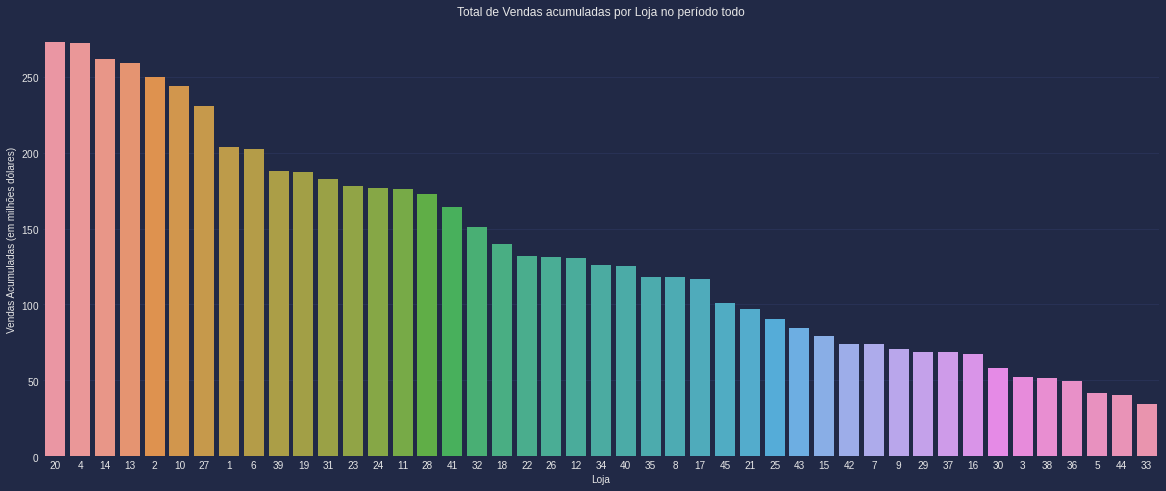

In [437]:
# criando df para a venda acumulada total na ultiam semana e ordenando o dataframe pela coluna de vendas acumuladas
df_last_week = df_clean[df_clean['Date']==max(df_wm['Date'])]
df_last_week=df_last_week.sort_values('Cumulative_Sales', ascending=False).reset_index()
order_df_last_week = df_last_week.sort_values('Cumulative_Sales', ascending=False)['Store']
# plotando o gráfico em colunas
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Cumulative_Sales', data=df_last_week,order=order_df_last_week)
plt.title('Total de Vendas acumuladas por Loja no período todo')
plt.xlabel('Loja')
plt.ylabel('Vendas Acumuladas (em milhões dólares)')
# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente

plt.show()

### **Vendas semanal média**

A plotagem da média de vendas semanais por loja revela que existem lojas com médias bastante elevadas, acima de 1 milhão de dólares por semana. Isso indica que há lojas com um desempenho excepcional em termos de vendas, provavelmente devido a fatores como localização, variedade de produtos, atendimento ao cliente e estratégias de marketing bem-sucedidas. Essas lojas podem ser consideradas líderes em vendas e têm um papel importante no desempenho geral da rede de varejo. Além disso, a distribuição das médias de vendas semanais por loja é bastante ampla, o que significa que há uma grande variedade de desempenhos entre as lojas.

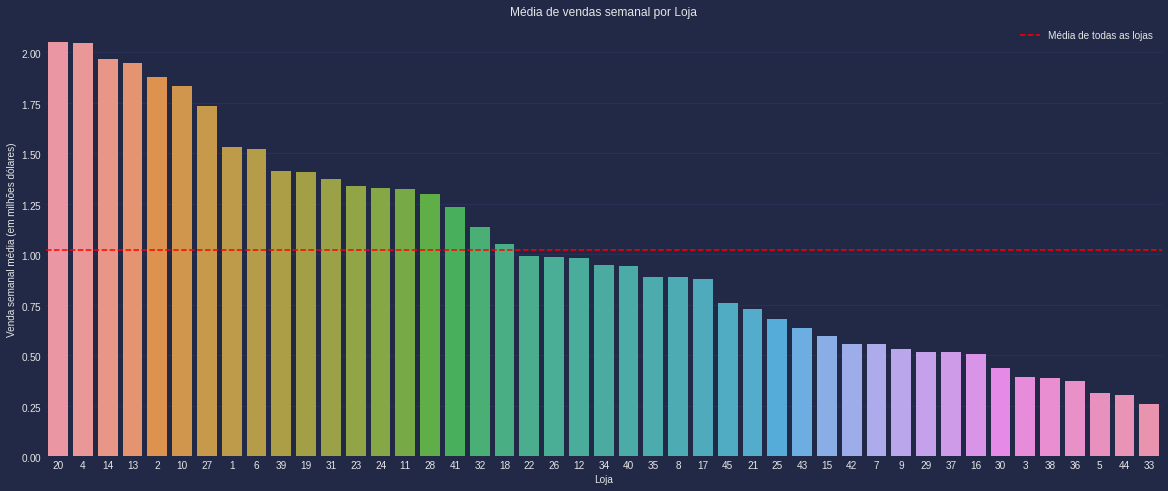

In [438]:
# calculando a média semanal de todas as lojas
mean_weekly_sales_all_stores = df_clean['Weekly_Sales'].mean() # em milhões de dólares
order_Mean_Weekly_Sales = df_clean.sort_values('Mean_Weekly_Sales', ascending=False)['Store'].unique()
# plotando o gráfico em colunas
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Mean_Weekly_Sales', data=df_clean,order=order_Mean_Weekly_Sales)
# adicionando a linha horizontal da média de todas as lojas
plt.axhline(y=mean_weekly_sales_all_stores, color='red', linestyle='--', label='Média de todas as lojas')
plt.title('Média de vendas semanal por Loja')
plt.xlabel('Loja')
plt.ylabel('Venda semanal média (em milhões dólares)')
# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente
plt.legend(loc='upper right')
plt.show()

### **Variação percentual das vendas semanais - Boxplot**

A plotagem do boxplot da variação percentual de vendas semanais por loja mostra que algumas lojas apresentam variações muito maiores do que outras. Enquanto algumas lojas possuem uma variação percentual relativamente baixa, outras apresentam uma variação muito mais ampla ao longo do tempo. Isso pode indicar diferenças significativas na estratégia de vendas das lojas ou mesmo fatores externos, como eventos sazonais ou variações econômicas que afetam algumas lojas de maneira mais acentuada do que outras. É importante avaliar essas diferenças na variação percentual de vendas para entender como as lojas respondem a diferentes fatores e como a empresa pode melhorar sua estratégia de vendas para maximizar o lucro.

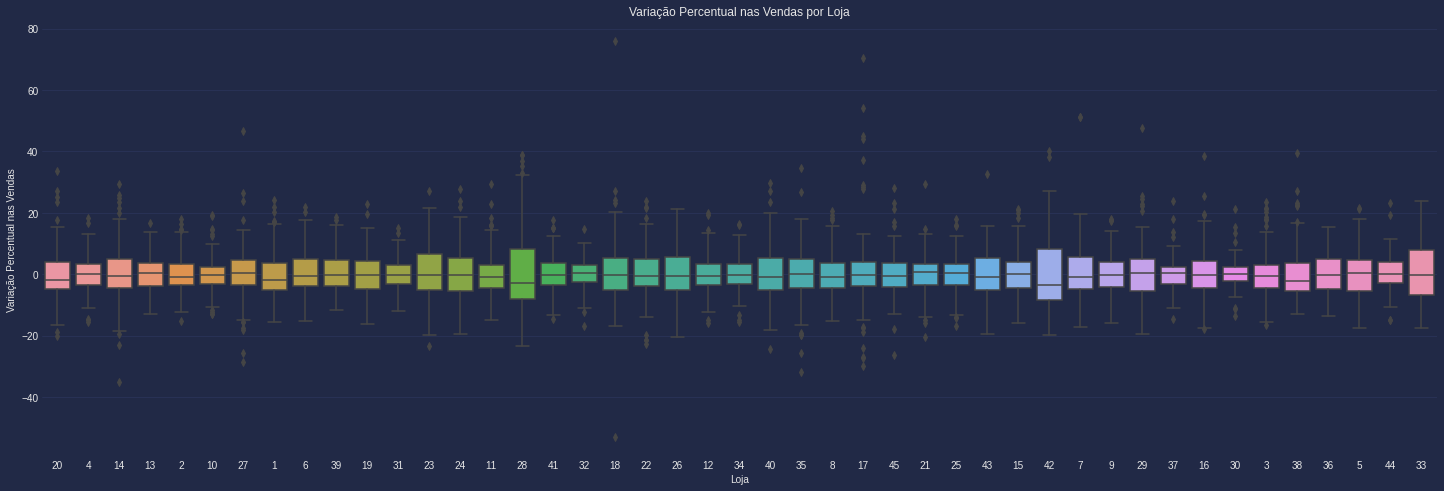

In [439]:
# criar DataFrame com colunas "Store" e "Weekly_Sales_Pct_Change"
df_var_pct = df_clean[['Store', 'Weekly_Sales_Pct_Change']]

# plotar boxplot para cada loja e variação percentual nas vendas
plt.figure(figsize=(25,8))
sns.boxplot(x='Store', y='Weekly_Sales_Pct_Change', data=df_var_pct,order=order_df_last_week)
plt.title('Variação Percentual nas Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Variação Percentual nas Vendas')
plt.show()

## **As métricas de sucesso**

Após a realização das análises estatísticas e a visualização dos gráficos, os responsáveis pela escolha da próxima loja da rede varejista perceberam a importância de definir métricas de sucesso para garantir o bom desempenho no mercado. 

Foi definido que a loja escolhida deve apresentar vendas acima da média, com margem para crescer em 30% e atingir os patamares das lojas com maiores vendas acumuladas. Além disso, é desejável que essa loja tenha pouca variação percentual de vendas semanais, pois isso indica que é mais previsível e segura para expansão. Por fim, é importante que a loja escolhida tenha um menor CPI e Unemployment em relação a outras, indicando um ambiente mais favorável para o varejo e maior potencial de crescimento. Com essas métricas definidas, a escolha da próxima loja será mais criteriosa e embasada em análises estatísticas e gráficos de desempenho, garantindo a escolha do melhor investimento para a rede varejista.

## **A escolha da loja**

Agora que já apresentamos a estratégia de escolha de lojas com bom potencial de retorno para a empresa, é necessário aplicar alguns filtros para garantir que as propriedades selecionadas atendam aos critérios de sucesso previamente definidos. Primeiramente, será feita uma separação das lojas com vendas acima da média, de modo que apenas aquelas que atendem a esse requisito serão consideradas na análise. Em seguida, será verificada a estabilidade na variação de vendas semanais, levando em consideração as lojas que apresentam menor variação percentual. Além disso, será considerado o potencial de crescimento das lojas selecionadas, com uma exigência de margem de pelo menos 30% para que possam atingir o patamar máximo de vendas das outras lojas. Por fim, serão avaliados outros fatores relevantes, como localização e custo por impacto (CPI) e taxa de desemprego (Unemployment) na região, a fim de garantir um investimento seguro e rentável. Com esses filtros em mente, será possível realizar uma análise mais criteriosa das lojas e escolher aquelas com maior potencial de retorno para a empresa.

### **Lojas com vendas semanais acima da média**

Realizamos um filtro para identificar as lojas com vendas semanais acima da média, reduzindo assim o número de lojas a serem analisadas de 45 para 19. Esse filtro foi essencial para focarmos em lojas que já possuem um desempenho acima da média e, portanto, apresentam maior potencial de crescimento e retorno financeiro para a empresa. Dessa forma, podemos direcionar nossos esforços e recursos para as lojas com maiores chances de sucesso e minimizar possíveis perdas em lojas com desempenho abaixo da média. Agora, podemos seguir para a análise mais detalhada das 19 lojas selecionadas, buscando identificar aquelas que apresentam maior estabilidade nas variações de vendas e que possuem margem para crescer em até 30% e atingir os patamares das lojas com maiores vendas.

In [440]:
## TOP VENDA SEMANAL ACIMA DA MEDIA
# Calcular a média semanal de vendas para cada loja
mean_weekly_sales_by_store = df_clean.groupby('Store')['Weekly_Sales'].mean()
# Filtrar as lojas em que a média semanal de vendas é maior que a média semanal de vendas de todas as lojas
above_mean_stores = mean_weekly_sales_by_store[mean_weekly_sales_by_store > mean_weekly_sales_all_stores].index

# Obter um novo dataframe com os dados apenas das lojas selecionadas
df_above_mean_stores = df_clean[df_clean['Store'].isin(above_mean_stores)]

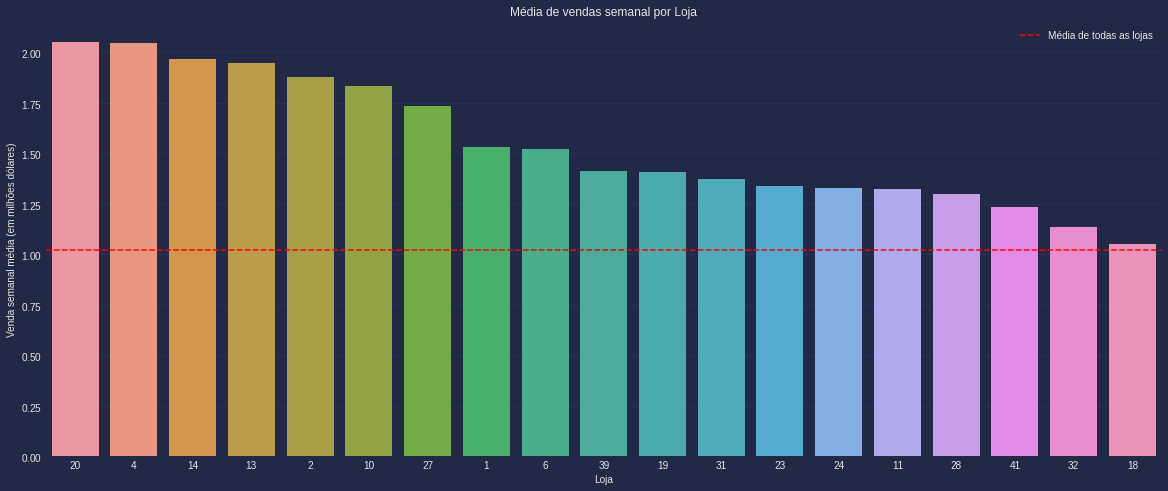

In [441]:
# plotando o gráfico em colunas
order_above_mean_stores = df_above_mean_stores.sort_values('Mean_Weekly_Sales', ascending=False)['Store'].unique()
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Mean_Weekly_Sales', data=df_above_mean_stores,order=order_above_mean_stores)
# adicionando a linha horizontal da média de todas as lojas
plt.axhline(y=mean_weekly_sales_all_stores, color='red', linestyle='--', label='Média de todas as lojas')
plt.title('Média de vendas semanal por Loja')
plt.xlabel('Loja')
plt.ylabel('Venda semanal média (em milhões dólares)')
# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente
plt.legend(loc='upper right')
plt.show()

### **Lojas com margem de crescimento de 30%**

Possuindo apenas as lojas acima da média agora foram selecionadas as lojas que apresentam um potencial de crescimento de pelo menos 30% em relação à média semanal máxima. Após a aplicação dos filtros e da análise de margem de lucro, foi possível reduzir a lista para apenas 12 lojas que atendem aos critérios de seleção. Isso mostra que nem todas as lojas com vendas acima da média possuem o mesmo potencial de crescimento, e é preciso uma análise mais aprofundada para identificar aquelas que realmente podem gerar bons resultados.

In [442]:
# Selecionando as lojas com potencial de crescimento de pelo menos 30%
lojas_com_potencial = df_above_mean_stores[df_above_mean_stores['Mean_Weekly_Sales'] <=df_above_mean_stores['Mean_Weekly_Sales'].max()/1.3]

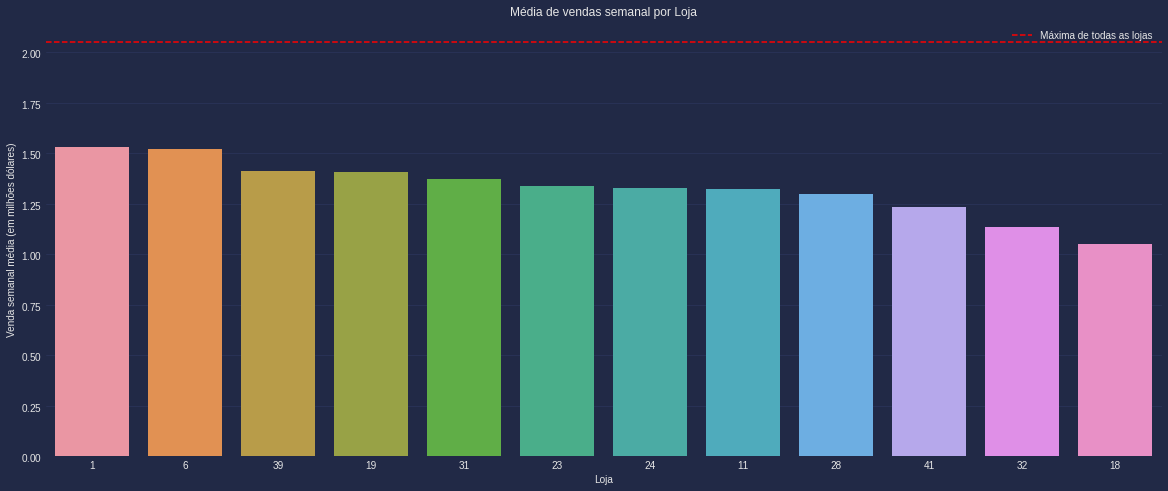

In [443]:
# Calcular a maxima semanal de vendas para cada loja
max_weekly_sales_all_stores = df_clean['Mean_Weekly_Sales'].max() # em milhões de dólares
# plotando o gráfico em colunas
order_lojas_com_potencial = lojas_com_potencial.sort_values('Mean_Weekly_Sales', ascending=False)['Store'].unique()
plt.figure(figsize=(20,8))
sns.barplot(x='Store', y='Mean_Weekly_Sales', data=lojas_com_potencial,order=order_lojas_com_potencial)
# adicionando a linha horizontal da média de todas as lojas
plt.axhline(y=max_weekly_sales_all_stores, color='red', linestyle='--', label='Máxima de todas as lojas')
plt.title('Média de vendas semanal por Loja')
plt.xlabel('Loja')
plt.ylabel('Venda semanal média (em milhões dólares)')
# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente
plt.legend(loc='upper right')
plt.show()

### **Lojas com menor variação percentual de vendas semanal**

Para analisar as lojas com menor variação percentual de vendas semanal, foi utilizado um gráfico de boxplot para visualização do intervalo de variação percentual nas vendas de todas as lojas. A partir disso, foram selecionadas as 5 lojas com menor desvio padrão, ou seja, as mais estáveis em relação à variação de vendas. Essas lojas apresentaram uma menor flutuação nas vendas ao longo do período analisado, o que pode ser um indicativo de maior previsibilidade e consistência nas operações. Com base nessa análise, a empresa pode considerar a possibilidade de direcionar recursos para essas lojas em busca de um melhor desempenho no longo prazo.

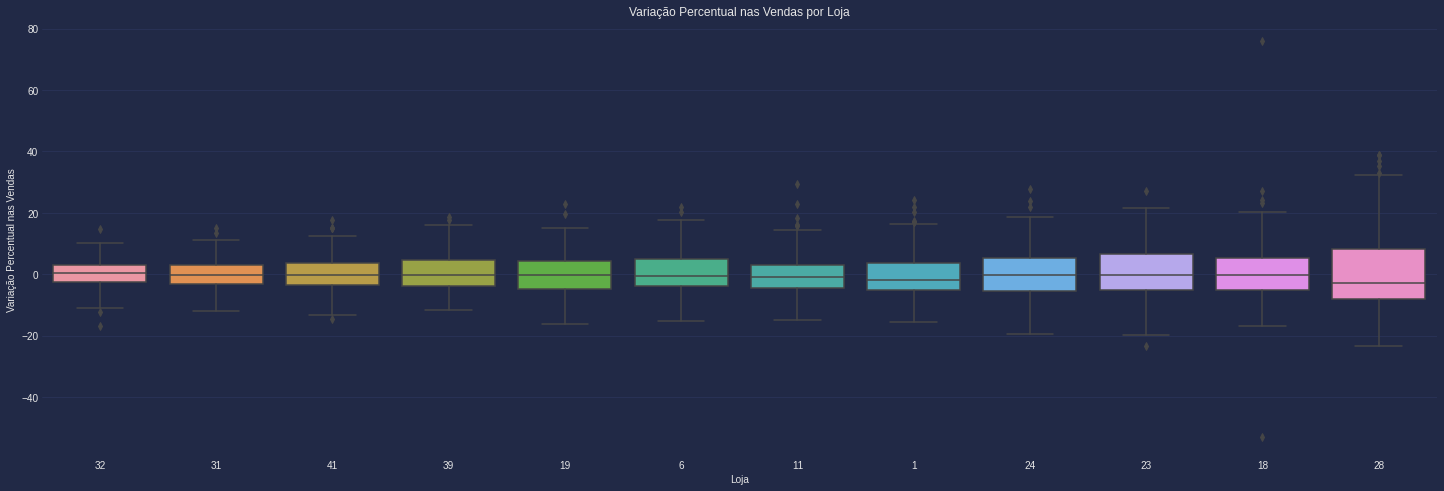

In [444]:
# criar DataFrame com colunas "Store" e "Weekly_Sales_Pct_Change"
df_var_pct = lojas_com_potencial[['Store', 'Weekly_Sales_Pct_Change']]

# ordenar as lojas pela variação percentual nas vendas
order_lojas_com_potencial = df_var_pct.groupby('Store').std().sort_values(by='Weekly_Sales_Pct_Change',ascending=True).index.tolist()

# plotar boxplot para cada loja e variação percentual nas vendas
plt.figure(figsize=(25,8))
sns.boxplot(x='Store', y='Weekly_Sales_Pct_Change', data=df_var_pct,order=order_lojas_com_potencial)
plt.title('Variação Percentual nas Vendas por Loja')
plt.xlabel('Loja')
plt.ylabel('Variação Percentual nas Vendas')
plt.show()

In [445]:
#TOP 5 ESTAVEIS
# calcular o desvio padrão de cada grupo
std_by_store = lojas_com_potencial.groupby('Store')['Weekly_Sales_Pct_Change'].std()
# classificar em ordem crescente
top5_stable_store = std_by_store.sort_values().index[0:5].to_list()
lojas_com_potencial_estavel = lojas_com_potencial[lojas_com_potencial['Store'].isin(top5_stable_store)].reset_index()
print("Das últimas "+str(len(lojas_com_potencial['Store'].unique()))+" lojas com potencial, as 5 lojas mais estáveis são as de número: "+', '.join(map(str,top5_stable_store)))

Das últimas 12 lojas com potencial, as 5 lojas mais estáveis são as de número: 32, 31, 41, 39, 19


#### **As 5 lojas com potencial mais estáveis**

Das lojas com potencial de crescimento e com menor variação percentual nas vendas semanais, selecionamos as cinco lojas com maior estabilidade em relação às variações de vendas, sendo as de número: 32, 31, 41, 39 e 19. Essas lojas apresentam uma amplitude na variação de vendas semanal menor que 20% para mais ou para menos, o que indica uma maior consistência nas vendas ao longo do tempo. Essa seleção foi realizada a partir da análise do gráfico de boxplot, que permite visualizar a distribuição e variação dos dados de forma clara e ordenada. As lojas selecionadas são representativas de um padrão de vendas mais estável e consistente, o que as torna interessantes para uma análise mais detalhada do seu potencial de retorno.

### **Visualização do CPI e taxa de desemprego médio**

Os gráficos apresentados mostram a média de CPI e desemprego por loja em relação à linha média de todas as lojas. É possível observar que todas as lojas apresentam uma taxa de desemprego muito próxima à média geral. 

Já em relação ao CPI, a loja 19 se destaca por apresentar um valor bem abaixo das demais lojas. Essa diferença pode ser um fator que influencia o desempenho de vendas dessa loja em relação às outras. 

Essa visualização é importante para identificar diferenças entre as lojas e ajudar na tomada de decisão para melhorias em cada uma delas, como também para identificar lojas com bom potencial de expansão. Nesse caso específico, a análise permitiu identificar a loja 19 como uma candidata a investimento em expansão, visto que apresentou um CPI bem abaixo da média das outras lojas estáveis com potencial de crescimento.

In [446]:
# criando a coluna de Unemployment média
weekly_sales_mean = lojas_com_potencial_estavel.groupby(['Store'])['Unemployment'].mean()
lojas_com_potencial_estavel['Mean_Unemployment'] = lojas_com_potencial_estavel['Store'].map(weekly_sales_mean)
# criando a coluna de CPI média
weekly_sales_mean = lojas_com_potencial_estavel.groupby(['Store'])['CPI'].mean()
lojas_com_potencial_estavel['Mean_CPI'] = lojas_com_potencial_estavel['Store'].map(weekly_sales_mean)

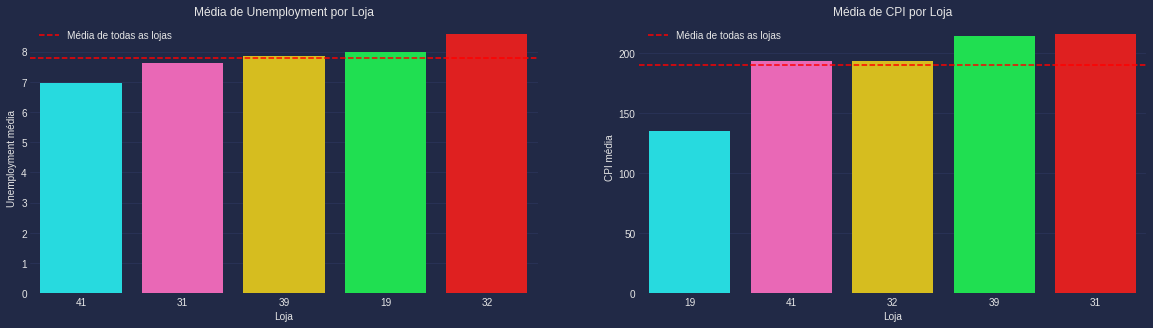

In [447]:
# calculando a média Unemployment de todas as lojas
mean_weekly_Unemployment_all_stores = lojas_com_potencial_estavel['Unemployment'].mean()
order_Unemployment = lojas_com_potencial_estavel.sort_values('Mean_Unemployment', ascending=True)['Store'].unique()
# calculando a média Unemployment de todas as lojas
mean_weekly_CPI_all_stores = lojas_com_potencial_estavel['CPI'].mean()
order_CPI = lojas_com_potencial_estavel.sort_values('Mean_CPI', ascending=True)['Store'].unique()

# Criar a figura com dois subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))

# Gráfico de média de Unemployment por loja
sns.barplot(x='Store', y='Mean_Unemployment', data=lojas_com_potencial_estavel, ax=ax1,order=order_Unemployment)
ax1.axhline(y=mean_weekly_Unemployment_all_stores, color='red', linestyle='--', label='Média de todas as lojas')
ax1.set_title('Média de Unemployment por Loja')
ax1.set_xlabel('Loja')
ax1.set_ylabel('Unemployment média')
ax1.legend(loc='upper left')

# Gráfico de média de CPI por loja
sns.barplot(x='Store', y='Mean_CPI', data=lojas_com_potencial_estavel, ax=ax2,order=order_CPI)
ax2.axhline(y=mean_weekly_CPI_all_stores, color='red', linestyle='--', label='Média de todas as lojas')
ax2.set_title('Média de CPI por Loja')
ax2.set_xlabel('Loja')
ax2.set_ylabel('CPI média')
ax2.legend(loc='upper left')
plt.show()

## **Loja 19: a loja escolhida para expansão**

Considerando o conjunto de dados original, sem a exclusão dos dados referentes aos feriados, a loja escolhida (**loja 19**) apresenta faturamento semanal médio é de cerca de 1,44 milhões de dólares, com um desvio padrão de 191,72 mil dólares. O índice de preços ao consumidor (CPI) médio é de 135,09, com um desvio padrão de 2,38, o que indica que a loja está próxima da média das demais lojas. Já a taxa média de desemprego é de 7,99%, também próxima da média, com um desvio padrão de 0,19. A loja apresentou uma variação percentual média de vendas semanais de 0,60%, com um desvio padrão alto de 11,49%. O faturamento acumulado da loja é de 206 milhões de dólares de dólares. Esses dados mostram que a loja 19 é relativamente estável em relação à média das outras lojas e possui um faturamento sólido e consistente, o que a torna uma boa candidata para a expansão.

In [448]:
loja_escolhida=df[df['Store']==19]

In [449]:
loja_escolhida.describe()

,Store,Holiday_Flag,Weekly_Sales,CPI,Unemployment,Weekly_Sales_Pct_Change,Mean_Weekly_Sales,Cumulative_Sales
count,143.0,143.000000,1.430000e+02,143.000000,143.000000,142.000000,1.430000e+02,1.430000e+02
mean,19.0,0.069930,1.444999e+06,135.092607,7.996252,0.607771,1.444999e+06,1.051708e+08
std,0.0,0.255926,1.917226e+05,2.378864,0.193968,11.494848,2.336490e-10,5.996987e+07
min,19.0,0.000000,1.181205e+06,131.527903,7.658000,-52.388026,1.444999e+06,1.507637e+06
25%,19.0,0.000000,1.351960e+06,132.756559,7.806000,-4.896308,1.444999e+06,5.355718e+07
50%,19.0,0.000000,1.408969e+06,135.083733,8.067000,0.086255,1.444999e+06,1.052461e+08
75%,19.0,0.000000,1.487577e+06,137.299707,8.150000,4.970569,1.444999e+06,1.573337e+08
max,19.0,1.000000,2.678206e+06,138.911700,8.350000,44.699319,1.444999e+06,2.066349e+08


In [450]:
loja_escolhida

,Store,Date,Holiday_Flag,Weekly_Sales,CPI,Unemployment,Weekly_Sales_Pct_Change,Mean_Weekly_Sales,Cumulative_Sales
2574,19,2010-02-05,0,1507637.17,131.527903,8.350,NaN,1.444999e+06,1.507637e+06
2575,19,2010-02-12,1,1536549.95,131.586613,8.350,1.917755,1.444999e+06,3.044187e+06
2576,19,2010-02-19,0,1515976.11,131.637000,8.350,-1.338963,1.444999e+06,4.560163e+06
2577,19,2010-02-26,0,1373270.06,131.686000,8.350,-9.413476,1.444999e+06,5.933433e+06
2578,19,2010-03-05,0,1495844.57,131.735000,8.350,8.925740,1.444999e+06,7.429278e+06
...,...,...,...,...,...,...,...,...,...
2712,19,2012-09-28,0,1338299.02,138.739500,8.193,-0.020415,1.444999e+06,2.012308e+08
2713,19,2012-10-05,0,1408016.10,138.825600,7.992,5.209380,1.444999e+06,2.026388e+08
2714,19,2012-10-12,0,1352809.50,138.911700,7.992,-3.920878,1.444999e+06,2.039916e+08
2715,19,2012-10-19,0,1321102.35,138.833613,7.992,-2.343800,1.444999e+06,2.053127e+08


### **Grafico de linhas comparativo**

O gráfico de linhas comparativo demonstra que a loja 19 pode ser uma boa opção para expansão devido às suas vendas consistentes e acima da média em relação às outras lojas. Além disso, o gráfico também revela que a loja 19 ainda tem um potencial de crescimento de cerca de 30%, o que a tornaria uma das lojas mais bem-sucedidas em termos de vendas. É importante ressaltar também que a loja 19 apresenta uma taxa de CPI favorável, o que indica que seus clientes possuem um bom poder de compra, e as variações de vendas ao longo do tempo são relativamente estáveis.

Esses fatores combinados sugerem que a loja 19 pode ser uma escolha estratégica para a expansão, uma vez que apresenta um alto desempenho e ainda possui espaço para crescer.

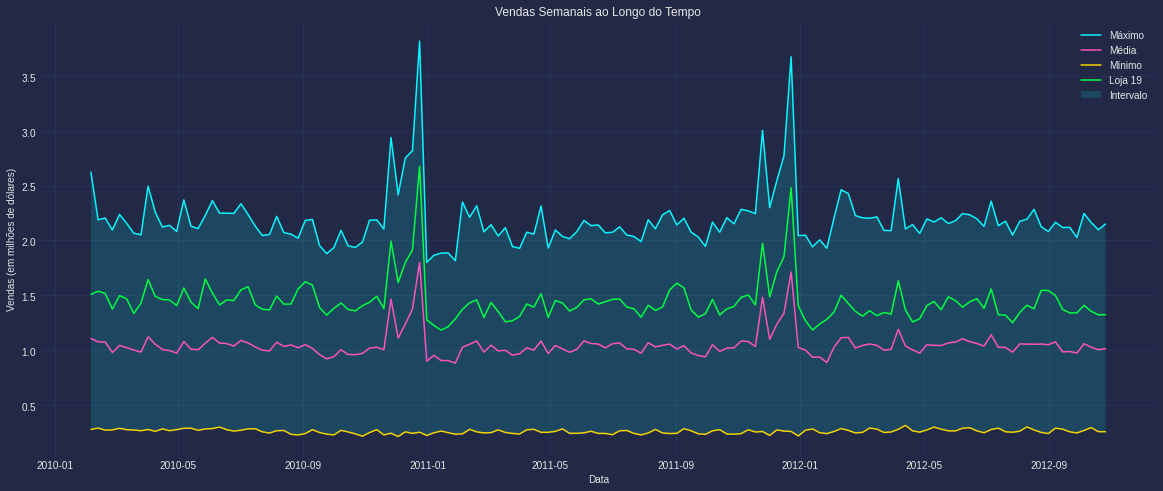

In [451]:
# agrupa os dados pela data e calcula os valores máximo, mínimo e médio de vendas semanais
df_grouped = df.groupby('Date')['Weekly_Sales'].agg(['max', 'min', 'mean'])

# cria o gráfico de linhas
plt.figure(figsize=(20,8))
sns.lineplot(data=df_grouped['max'],label='Máximo')
sns.lineplot(data=df_grouped['mean'],label='Média')
sns.lineplot(data=df_grouped['min'],label='Mínimo')

sns.lineplot(data=loja_escolhida,x='Date',y='Weekly_Sales',label='Loja 19')
plt.fill_between(df_grouped.index, df_grouped['min'], df_grouped['max'], alpha=0.15, label='Intervalo')

# configura o gráfico
plt.title('Vendas Semanais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas (em milhões de dólares)')
plt.legend()
# formatando os valores do eixo y em notação científica com multiplicação por 1 milhão
plt.ticklabel_format(style='sci', axis='y', scilimits=(6,6), useMathText=True)
plt.gca().yaxis.get_offset_text().set_visible(False) # remove o expoente

# exibe o gráfico
plt.show()

## **Conclusão**

Ao final deste trabalho de escolha da loja 19, foi possível identificar uma opção de investimento promissora para expansão de uma rede de varejo, considerando a análise dos dados disponíveis e a questão de negócio proposta.

A partir do tratamento do dataset disponibilizado no Kaggle e da aplicação de técnicas de visualização de dados e análise exploratória, foi possível identificar a loja 19 como uma opção com vendas acima da média e potencial de crescimento de 30%, além de apresentar uma boa taxa de CPI e variação de vendas sem muitas oscilações. Assim, espera-se que a escolha desta loja possa ser uma decisão mais estratégica, garantindo um melhor aproveitamento dos recursos disponíveis e maximizando os resultados da rede de varejo. 

A metodologia utilizada demonstra a importância da análise de dados e a utilização de ferramentas de ciência de dados para embasar decisões empresariais.